## 3. 다양한 데이터 포멧 이해하기: XML

### 3.1. XML 포멧 이해하기
* XML(Extensible Markup Language)
  - 특정 목적에 따라 데이터를 태그로 감싸서 마크업하는 범용적인 포멧
  - 마크업 언어는 태그 등을 이용하여 데이터의 구조를 기술하는 언어의 한 가지
  - 가장 친숙한 마크업 언어가 HTML
  - XML은 HTML과 마찬가지로 데이터를 계층 구조로 표현
  - XML 기본 구조
    ```
    <태그 속성="속성값">내용</태그>

    ```
  - 태그와 속성은 특정 목적에 따라 임의로 이름을 정해서 사용
    ```
    <product id="M001" price="300000">32인치 LCD 모니터</product>  
    ```
  - 다른 요소와 그룹으로 묶을 수도 있음
    ```
    <products type="전자제품">
        <product id="M001" price="300000">32인치 LCD 모니터</product>
        <product id="M002" price="210000">24인치 LCD 모니터</product>
    </products>  
    ```

### 3.2. XML 파일 읽고 데이터 추출하기
1. open() 함수로 xml 데이터 읽기
2. xml 데이터 파싱하기
3. select() 로 원하는 데이터 태그 선택하기
   - 리턴값은 리스트 타입
   - 원하는 데이터가 하나일 경우에는 select_one() 함수 사용
   - 실제 데이터는 각 아이템.text 로 추출가능

```
data_file = open('users.xml', 'r', encoding='utf-8-sig') # 1. xml 데이터 읽기
soup = BeautifulSoup(data_file, 'xml')                   # 2. xml 데이터 파싱하기
users = soup.select('user')                              # 3. 원하는 데이터 관련 태그 선택하기
for user in users:                                       # 4. 리스트이므로 for 문으로 아이템 추출
    print(user.text)                                     # 5. 각 아이템.text 로 원하는 데이터 출력
```

### 파싱 (parsing)과 데이터 추출 코드 이해
- 일종의 xml 데이터를 분석해서, 빠르게 원하는 데이터를 추출할 수 있도록 트리(tree) 형태로 만드는 것
- pip install bs4

```python
from bs4 import BeautifulSoup
soup = BeautifulSoup(xml파일디스크립터, 'xml')
soup.select(원하는 데이터 태그)
```

### 예제 코드

In [8]:
from bs4 import BeautifulSoup

data_file = open(r'./data/test_xml.xml', 'r', encoding='utf-8')
soup = BeautifulSoup(data_file, 'xml')


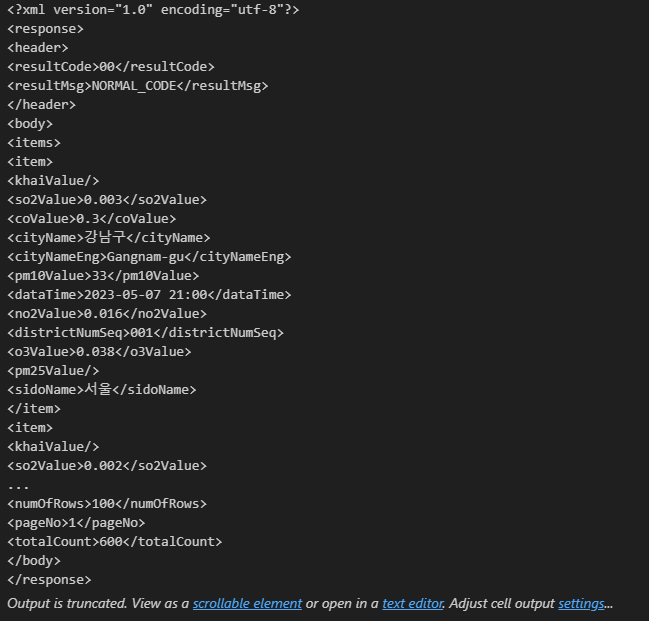

In [2]:
resultMsg = soup.select_one('resultMsg')

print(resultMsg.text)

NORMAL_CODE


### 시/도명과 구 이름 각각 추출하려면?

In [10]:
from bs4 import BeautifulSoup

data_file = open(r'./data/test_xml.xml', 'r', encoding='utf-8')
soup = BeautifulSoup(data_file, 'xml')

items = soup.select('item')

for it in items:
    sidoName = it.select_one('sidoName').text
    cityName = it.select_one('cityName').text

    # print(sidoName,cityName)

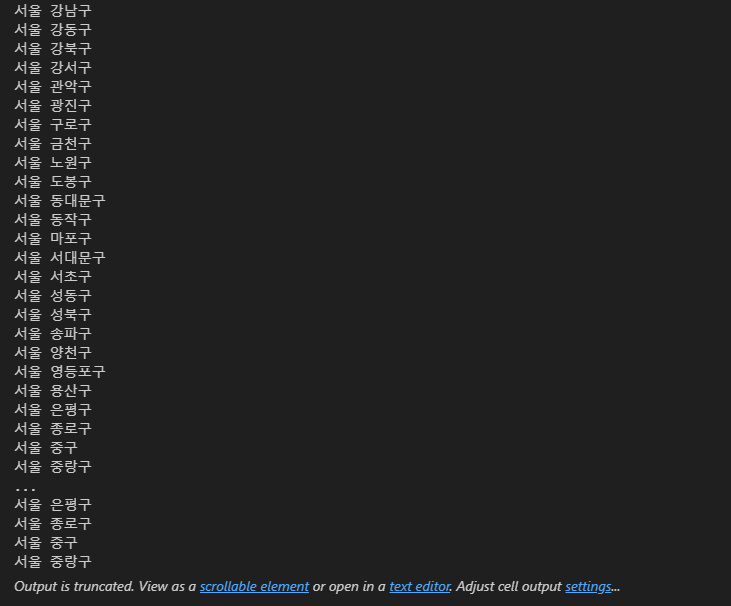

### 예제 코드 (연습 문제 풀이)

```
연습문제
```
- http://suggestqueries.google.com/complete/search?output=toolbar&q= 에 키워드를 추가하면 연관 검색어를 추출 가능
- XML 포멧으로 되어 있으므로, 태그과 속성값 추출 기술을 활용해서 추출 가능



In [4]:
import requests
from bs4 import BeautifulSoup

keyword = '스마트폰'
google_related_keyword_api = 'http://suggestqueries.google.com/complete/search?output=toolbar&q=' + keyword
response = requests.get(google_related_keyword_api)       # 파일이 아니라, 데이터를 Open API 에서 가져오기 위한 함수
soup = BeautifulSoup(response.content, 'xml')             # requests.get() 의 리턴값은 객체
                                                          # 객체.content 에 가져온 데이터가 있음

datas1 = soup.select('suggestion')

for item in datas1:
    print(item['data'])

스마트폰
스마트폰을 떨어뜨렸을 뿐인데
스마트폰 중독
스마트폰갤
스마트폰 png
스마트폰 거치대
스마트폰 찾기
스마트폰 인증서이동 서비스
스마트폰 tv 미러링
스마트폰 목업
